In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
print(tf.__version__)

2.4.0


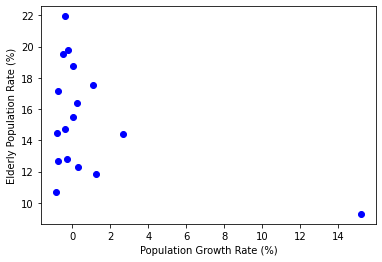

In [5]:
# 인구증가율 대비 나이많은사람 비율 보기
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, 
-0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 
21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

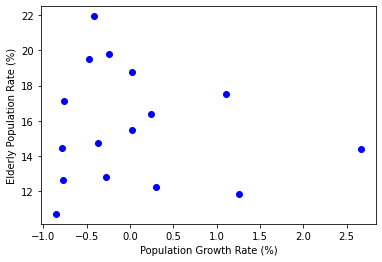

In [6]:
# 외톨이(outlier)를 제외하고 다시 보기
population_inc=population_inc[:5]+population_inc[6:] # idx 5인 원소 제외
population_old=population_old[:5]+population_old[6:]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

a: -0.355834147915461 b: 15.669317743971302


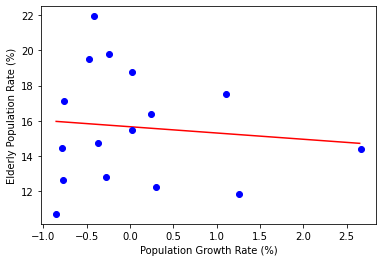

In [8]:
# linear regression 하기 
X=population_inc
Y=population_old

x_bar=sum(X)/len(X)
y_bar=sum(Y)/len(y)

a=sum([(y-y_bar)*(x-x_bar) for y,x in list(zip(Y,X))])
a /= sum([(x-x_bar)**2 for x in x])
b=y_bar-a*x_bar
print('a:',a,'b:',b)

line_x=np.arange(min(X),max(X),0.01)
line_y=a*line_x+b

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: 3.9560413 b: -5.733674 c: 6.502025 loss: 68.11737
199 a: 2.813161 b: -4.5796046 c: 10.289542 loss: 31.60045
299 a: 1.298218 b: -2.3178957 c: 12.908716 loss: 16.143822
399 a: 0.33616966 b: -0.8744951 c: 14.554267 loss: 11.023191
499 a: -0.18065993 b: -0.0994591 c: 15.440267 loss: 9.740964
599 a: -0.42058986 b: 0.2603079 c: 15.85175 loss: 9.496201
699 a: -0.51718354 b: 0.4051441 c: 16.017424 loss: 9.460462
799 a: -0.55095726 b: 0.4557865 c: 16.075346 loss: 9.456472
899 a: -0.56120414 b: 0.4711519 c: 16.092922 loss: 9.456133
999 a: -0.5638903 b: 0.47517875 c: 16.09753 loss: 9.456112


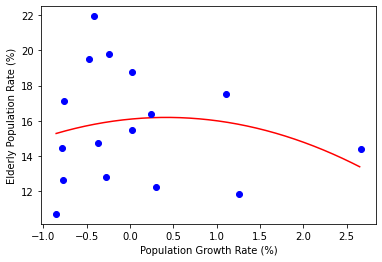

In [12]:
a=tf.Variable(random.random())
b=tf.Variable(random.random())
c=tf.Variable(random.random())

def function(X):
    y_pred=a*X*X+b*X+c
    return y_pred

# MSE
def compute_loss():
    y_pred = function(X)
    loss=tf.reduce_mean((Y-y_pred)**2)
    return loss

# 최적화 기법 
optimizer=tf.keras.optimizers.Adam(lr=0.07)

# 최적화  
for i in range(1000):
    optimizer.minimize(compute_loss,var_list=[a,b,c])
    if i%100==99:
        print(i,'a:',a.numpy(),'b:',b.numpy(),'c:',c.numpy(),'loss:',compute_loss().numpy())

line_x=np.arange(min(X),max(X),0.01)
line_y=a*line_x*line_x+b*line_x+c

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

In [19]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=6,activation='tanh',input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),loss='mse')
model.fit(X,Y,epochs=10,verbose=0) # 훈련 진행 상태 안 보이게 (풀배치)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


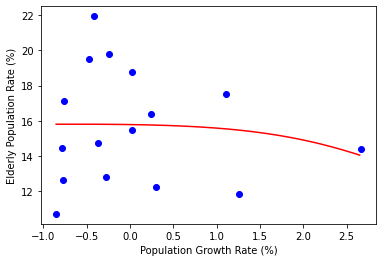

In [15]:
line_x=np.arange(min(X),max(X),0.01)
line_y=model.predict(line_x)
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()